In [151]:
#import rich.pretty
#import commons
from db_actions import db_actions
import pandas as pds
import numpy as np

In [152]:
with db_actions.connect() as conn:
    dF = pds.read_sql('SELECT * FROM "averageRuntimesPredictionBase1000"', conn)
    # print(dF)
x_cols = [
        "build-linux-kernel1",
        "fio2",
        "fio3",
        "fio4",
        "fio5",
        "fio6",
        "fio7",
        "fio8",
        "fio9",
        "iperf10",
        "iperf11",
        #"iperf12",
        "iperf13",
        "john-the-ripper14",
        "john-the-ripper15",
        "ramspeed16",
        "ramspeed17",
        "ramspeed18",
        "ramspeed19",
        "ramspeed20",
        "ramspeed21",
        "ramspeed22",
        "ramspeed23",
        "ramspeed24",
        "ramspeed25",
        "stream26",
        "stream27",
        "stream28",
        "stream29",
        "pCpu",
        "cpus",
        "rss",
        "vmem",
        "rchar",
        "wchar",
        "syscr",
        "syscw",
    ]
y_cols = "rank"
X = dF[x_cols]
y = dF[y_cols]

In [153]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [154]:
X

,build-linux-kernel1,fio2,fio3,fio4,fio5,fio6,fio7,fio8,fio9,iperf10,...,stream28,stream29,pCpu,cpus,rss,vmem,rchar,wchar,syscr,syscw
0,4,4,1,6,1,2,2,2,2,13,...,6,6,169.398332,2.0,3.227893e+08,8.896484e+09,3.604557e+07,7.123642e+05,18072.933333,236.583333
1,13,4,1,21,1,2,2,2,2,2,...,7,7,172.296666,2.0,2.798736e+08,8.904040e+09,3.604494e+07,7.123477e+05,18072.600000,236.583333
2,3,25,1,4,1,2,2,2,2,4,...,8,8,173.391668,2.0,3.001020e+08,8.920521e+09,3.604553e+07,7.123549e+05,18072.883333,236.583333
3,21,4,1,6,1,2,2,2,2,12,...,23,23,169.503334,2.0,3.697622e+08,8.937702e+09,3.604470e+07,7.123499e+05,18072.466667,236.583333
4,1,18,1,21,1,2,2,2,2,14,...,4,4,166.208333,2.0,3.283890e+08,8.905091e+09,3.604556e+07,7.123542e+05,18072.916667,236.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,25,25,1,27,1,2,2,2,2,20,...,21,21,168.706669,2.0,2.299183e+08,2.872655e+09,2.510351e+08,2.024109e+08,58832.866667,34999.633333
2129,20,18,1,21,1,2,2,2,2,17,...,20,20,164.616667,2.0,2.284317e+08,3.141343e+09,2.510357e+08,2.024109e+08,56013.366667,34998.366667
2130,18,11,1,6,1,2,2,2,2,22,...,18,17,163.870000,2.0,2.166854e+08,3.140811e+09,2.510351e+08,2.024109e+08,56402.566667,34997.900000
2131,10,11,1,6,1,2,2,2,2,27,...,16,16,165.026665,2.0,2.096554e+08,3.141013e+09,2.510350e+08,2.024131e+08,56188.133333,34993.200000


In [155]:
g = GenericUnivariateSelect(f_regression,mode='k_best', param=15)
X_poly = PolynomialFeatures(3, interaction_only=True).fit_transform(X)
X_new = g.fit_transform(X_poly,y)
#filtered_X_cols = np.array(x_cols)[g.get_support(indices=True)]
#", ".join(map(lambda x: repr(x), filtered_X_cols))

In [156]:
#filtered_X_cols

In [157]:
import seaborn as sbs
sorted(np.array(g.scores_)[g.get_support(indices=True)])

[974.3273816848804,
 976.2623823404572,
 984.3628650899905,
 986.0407127565279,
 986.5731532096335,
 988.2581073005159,
 991.8626891226859,
 992.5257816993559,
 1001.8707649973844,
 1015.5266907876013,
 1021.1695521511341,
 1022.5741144470472,
 1039.0619240462222,
 1147.5687770025202,
 1177.515613752598]

In [158]:
len(np.array(g.scores_)[g.get_support(indices=True)])

15

<AxesSubplot:>

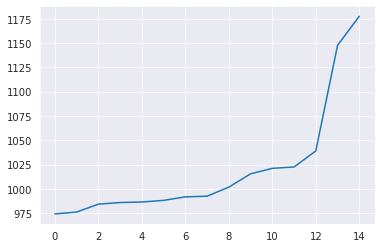

In [159]:
sbs.lineplot(data=sorted(np.array(g.scores_)[g.get_support(indices=True)]))